In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [54]:
pal = sns.color_palette(['#5494da', '#5dcdf9', '#e8e37c', '#f3b595', '#f09895'])

In [55]:
print(os.listdir('..'))
df = pd.read_csv('../data_compare.csv')

['test_static_synthetic.sh~', 'test_fenwick_synthetic.sh~', 'test_all_synthetic.sh', 'include', 'test_sensor.sh', '.gitignore', 'test_query.sh', 'tests', 'external', 'test_gowalla.sh', '.gitmodules', 'test_static_synthetic.sh', 'test_sensor5.sh', '.idea', 'test_varden_fast.sh', '.~lock.data_compare.csv#', 'data.csv', 'test_priority_synthetic.sh', 'test_uniform_fast.sh', 'data_compare.csv', 'notebooks', 'README.md', 'test_simden_fast.sh', 'images', 'src', 'test_sensor.sh~', 'test_all.sh', 'test_sensor5.sh~', 'results', 'test_fenwick_synthetic.sh', '.git', 'CMakeLists.txt', 'test_HT.sh', 'test_uniform.sh', 'brutetest.sh', 'test_PAMAP2.sh~', 'test_GeoLife.sh', 'test_GeoLife.sh~', 'plot_graphs.py', 'test_varden.sh', 'test_PAMAP2.sh']


In [56]:
df.head()

,Algorithm,uniform,simden,varden,GeoLife,PAMAP2,Sensor5,HT,Query,Gowalla
0,DPC-EXACT-BASELINE,125.441890,296.805640,256.278820,NaN,6.407207,13852.716570,6652.432380,0.376593,14.720717
1,DPC-APPROX-BASELINE,NaN,8.739697,2078.411195,28.121813,0.861702,318.599373,2144.927149,13.583064,NaN
2,DPC-FENWICK,15.428904,5.847936,5.632386,22.480997,0.148139,4.751136,0.847205,0.031983,0.781705
3,DPC-INCOMPLETE,28.500387,13.116446,10.597735,25.031864,5.181544,7.289989,1.625831,0.054303,1.484193
4,DPC-PRIORITY,9.298376,2.944668,2.862699,12.797349,0.594393,3.939579,0.505159,0.019062,0.400195


In [57]:
lll = []
for i, row in df.iterrows():
    ll = [[row['Algorithm'], df.columns[j+1], t] for j,t in enumerate(row[1:])]
    lll += ll
print(lll)
df_new = pd.DataFrame(lll, columns=['Algorithm', 'Dataset', 'Runtime'])

[['DPC-EXACT-BASELINE', 'uniform', 125.44189], ['DPC-EXACT-BASELINE', 'simden', 296.80564], ['DPC-EXACT-BASELINE', 'varden', 256.27882], ['DPC-EXACT-BASELINE', 'GeoLife', nan], ['DPC-EXACT-BASELINE', 'PAMAP2', 6.407206667], ['DPC-EXACT-BASELINE', 'Sensor5', 13852.71657], ['DPC-EXACT-BASELINE', 'HT', 6652.43238], ['DPC-EXACT-BASELINE', 'Query', 0.376593], ['DPC-EXACT-BASELINE', 'Gowalla', 14.720717], ['DPC-APPROX-BASELINE', 'uniform', nan], ['DPC-APPROX-BASELINE', 'simden', 8.739697], ['DPC-APPROX-BASELINE', 'varden', 2078.411195], ['DPC-APPROX-BASELINE', 'GeoLife', 28.12181333], ['DPC-APPROX-BASELINE', 'PAMAP2', 0.8617016667], ['DPC-APPROX-BASELINE', 'Sensor5', 318.5993726], ['DPC-APPROX-BASELINE', 'HT', 2144.927149], ['DPC-APPROX-BASELINE', 'Query', 13.58306367], ['DPC-APPROX-BASELINE', 'Gowalla', nan], ['DPC-FENWICK', 'uniform', 15.42890427], ['DPC-FENWICK', 'simden', 5.847936], ['DPC-FENWICK', 'varden', 5.632385967], ['DPC-FENWICK', 'GeoLife', 22.48099723], ['DPC-FENWICK', 'PAMAP2',

In [58]:
df_new.loc[df_new['Runtime'].isnull(), 'Runtime'] = 100000
df_new.head()

,Algorithm,Dataset,Runtime
0,DPC-EXACT-BASELINE,uniform,125.441890
1,DPC-EXACT-BASELINE,simden,296.805640
2,DPC-EXACT-BASELINE,varden,256.278820
3,DPC-EXACT-BASELINE,GeoLife,100000.000000
4,DPC-EXACT-BASELINE,PAMAP2,6.407207


/tmp/ipykernel_30753/2375275775.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['0.0001', '0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000', 'INF'])


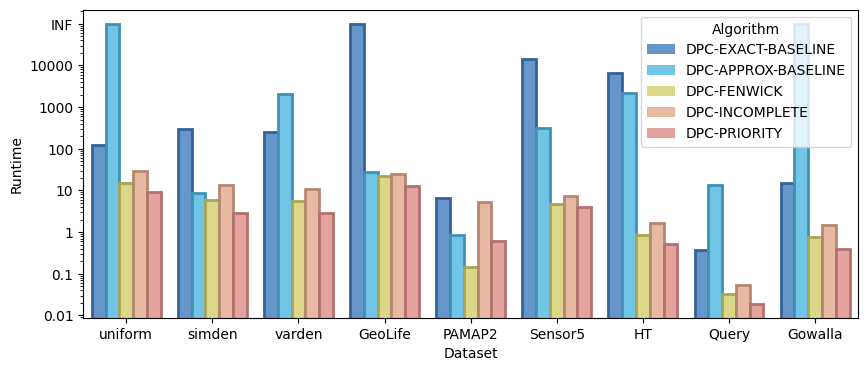

In [59]:
plt.figure(figsize=(10, 4))
g=sns.barplot(data=df_new, x='Dataset', y='Runtime', hue='Algorithm', palette=pal, linewidth=2)
for patch in g.patches:
    clr = np.array(patch.get_facecolor())
    clr[:-1] -= 50/255
    patch.set_edgecolor(clr)
g.set_yscale("log")
g.set_yticklabels(['0.0001', '0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000', 'INF'])
plt.savefig('../images/compare_all.png')